## MIMIC-3 Analysis: Feature Engineering

This week we will delve further into the feature engineering possible with our dataset and examine some of the effects which can arise as a result. We will also go into greater depth concerning the features themselves.

## Configuration

We start off the same as we did last week.

In [0]:
from google.colab import drive, files
drive.mount('/content/drive')

In [1]:
% cd /content/drive/My Drive/SCIE3250 Journal/Week 9

/content/drive/My Drive/SCIE3250 Journal/Week 9


In [0]:
! pip install causalnex
! pip install --upgrade pandas==0.24.0  # We require this version of pandas

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
files.upload()

In [3]:
import pandas as pd
df = pd.read_csv('mimic_day_blocks_ARDS2.csv', delimiter=',')
df.head()

,HADM_ID,CHARTDATE,BMI,RSC,PaO2/FiO2,PaCO2,Tidal_ml,Plateau_Pressure_cmH2O,Total_PEEP_cmH2O,PaO2,FiO2,ARDS,AGE,GENDER,AGE_INTERVALS,HCO3,Creatinine
0,100024,2170-09-19,29.52852,42.38806,2.28000,45.0,568.0,19.0,5.6,114.0,50.0,0,71,M,"(70, 75]",24.0,0.8
1,100035,2115-02-22,31.63272,25.00000,1.40000,97.0,500.0,30.0,10.0,84.0,60.0,1,37,M,"(35, 40]",33.0,1.2
2,100035,2115-02-23,31.63272,37.42857,0.93333,35.0,524.0,30.0,16.0,56.0,60.0,1,37,M,"(35, 40]",24.0,1.0
3,100035,2115-02-24,31.63272,50.72727,1.06154,54.0,558.0,24.0,13.0,69.0,65.0,1,37,M,"(35, 40]",30.0,0.8
4,100035,2115-02-25,31.63272,40.10000,2.10000,59.0,401.0,30.0,20.0,84.0,40.0,1,37,M,"(35, 40]",30.0,1.6


Again we digitalise our discrete variables and create a copy dataframe we are free to edit destructively. This time we do not digitalise \``CHARTDATE`\` however; we intend to use it later on.

In [4]:
import numpy as np
df_enc = df.copy()

non_numeric_columns = ['GENDER', 'AGE_INTERVALS']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    df_enc[col] = le.fit_transform(df_enc[col])

df_enc.head(5)

,HADM_ID,CHARTDATE,BMI,RSC,PaO2/FiO2,PaCO2,Tidal_ml,Plateau_Pressure_cmH2O,Total_PEEP_cmH2O,PaO2,FiO2,ARDS,AGE,GENDER,AGE_INTERVALS,HCO3,Creatinine
0,100024,2170-09-19,29.52852,42.38806,2.28000,45.0,568.0,19.0,5.6,114.0,50.0,0,71,1,11,24.0,0.8
1,100035,2115-02-22,31.63272,25.00000,1.40000,97.0,500.0,30.0,10.0,84.0,60.0,1,37,1,4,33.0,1.2
2,100035,2115-02-23,31.63272,37.42857,0.93333,35.0,524.0,30.0,16.0,56.0,60.0,1,37,1,4,24.0,1.0
3,100035,2115-02-24,31.63272,50.72727,1.06154,54.0,558.0,24.0,13.0,69.0,65.0,1,37,1,4,30.0,0.8
4,100035,2115-02-25,31.63272,40.10000,2.10000,59.0,401.0,30.0,20.0,84.0,40.0,1,37,1,4,30.0,1.6


## Feature Engineering, Imputation (revised)

Foreseeing our final report, the following descriptions are intended to be tabulated alongside the selected MIMIC-3 features. Accordingly we use Latex scripting. For sections in Latex we write % LATEX BEGINNING and % LATEX END. A reference list has been made elsewhere, also in Latex scripting.

% LATEX BEGINNING

Acute Respiratory Distress Syndrome (ARDS) was first described in 1967 by Ashbaugh et al. as a clinical pattern featuring "severe dyspnea, tachypnea, cyanosis that is refractory to oxygen therapy, loss of lung compliance, and diffuse alveolar infiltration seen on chest x-ray". For our purposes ARDS diagnosis corresponds to rapid respiratory failure due to an existing condition and is associated with a high mortality rate. In Ashbaugh et al's original study, 7 of the 12 cases were fatal.

Body Mass Index (BMI) is a metric of body fat level defined as $\frac{mass}{height^2}$ measured in kg m\textsuperscipt{-2} (T. C. Chan School of Public Health, 2020).

Partial oxygen pressure (PaO2) is the pressure due to oxygen present in arterial blood; in MIMIC-3 it is measured in units of mm Hg. PaO2 is often considered alongside the fraction of inspired oxygen (FiO2) measured as a percentage, with the quantity $\frac{PaO2}{FiO2}$ considered an indication of respiratory function and a metric for diagnosis with ARDS. We also note that Inal et al. promote a link between ICU length of stay and $\frac{PaO2}{FiO2}$ (2012).

Tidal volume, measured in ml in MIMIC-3, is the mean volume of displaced air between inhalation and exhalation. As we will discuss there exists a complex relationship between $\frac{PaO2}{FiO2}$, plateau pressure and PEEP. If a patient is ventilated, tidal volume is a parameter under the control of the attending physician. In this case, decreased tidal volumes are associated with improved outcomes (Ramrakha, 2010).

Plateau pressure is the lung pressure over the pause between inhalation and exhalation (Downham, 2019). In MIMIC-3 plateau pressure is given in units of cm H2O, defined as the pressure due to a cubic centimetre of water under the influence of gravity at the surface of the Earth.

Positive end expiratory pressure (PEEP) refers to the pressure exerted by a ventilator over the pause following exhalation. The alveoli are lined with liquid, the surface tension of which must be sufficiently low so as to avoid alveolar collapse. Usually this is regulated by the presence of the substance surfactant, serving to reduce the surface tension (Downham, 2019). However, mechanical ventilation can often lead to a reduction in surfactant levels. To prevent alveolar collapse, the ventilator maintains a PEEP over the pause following exhalation. The difference between the plateau pressure and the PEEP is referred to as the driving pressure. As for plateau pressure, driving pressure and PEEP are both measured in units of cm H2O.

Respiratory System Compliance (RSC) here refers to a metric also known as static compliance, intended as an indicator of respiratory function. RSC is computed as the ratio of the tidal volume and driving pressure ($\frac{V_t}{P_d}$).

Bicarbonate (HCO3) level is an arterial blood gas measure, as is PaO2 and PaCO2 which we will approach next. HCO3 is part of a 'buffer' system designed to correct for bodily acid imbalances, in particular "HCO3 is the most important buffer in the blood and is the dominant buffer in the interstitial fluid" (Rudall \& Moswela, 2011). MIMIC-3 presents HCO3 levels in units of moles per litre, mmol L\textsupercript{-1}.

Partial pressure of carbon dioxide (PaCO2) is the pressure due to carbon dioxide present in arterial blood. Intended to gauge the balance between carbon dioxide creation and exhalation, PaCO2 is considered a metric for ICU admission in the case of respiratory illness (Ramrakha, 2010).

Creatinine is a broad indication of renal function. We note that creatinine levels are usually lower in elderly patients, sometimes concealing renal dysfunction (Royal Australian College of Pathologists, 2019).

Patient age.

Patient sex.

HADM_ID refers to unique patient identification number, allowing us to track progress while retaining patient anonymity.

CHART_DATE is the date at which the observation was recorded, although randomly shifted to further ensure patient anonymity. Relative timespans remain intact however to preserve progress tracking.

% LATEX END

Accordingly we drop \``FiO2`\` and \``PaO2`\` in favour of \``PaO2/FiO2`\` as well as \``Tidal_ml`\`, \``Plateau_Pressure_cmH2O`\` and \``Total_PEEP_cmH2O`\` for \``RSC`\`. However we return to the driving pressure in the future, comparing it to RSC as a metric. Also we see that it will be best to have a quick means of restoring our working dataframe, hence the previous title\``df_enc`\`.

In [0]:
df_e = df_enc.copy()
drops = ['PaO2', 'FiO2', 'Tidal_ml', 'Plateau_Pressure_cmH2O', \
  'Total_PEEP_cmH2O', 'AGE_INTERVALS']
df_e = df_e.drop(columns=drops)

In the actual table we will present all definitions related to RSC and state our intention to check the driving pressure alone as a metric.

This week we implement a K nearest neighbours algorithm for imputation along with an adaptation of \``CHARTDATE`\` to provide a measure of daily change in \``RSC`\`, \``PaO2/FiO2`\` and \``Creatinine`\`.

% LATEX BEGINNING

Our subset of MIMIC-3 originates from the \url{CHARTEVENTS} table, which contains all data available on a per-patient basis. From there we selected all patients for which our parameters of interest were recorded. From the vast set of parameters described by MIMIC-3, these were those listed below in \textit{Table 1}. For many patients, multiple records had been reported per day while for others only daily records existed; we needed to choose a standardised reporting frequency. To maximise the size of our dataset, we chose this to be daily. Selecting patients in this way, our dataset was cut from containing around 40 000 to just 3283 patients with 8636 records.

\bigskip

Although these patients as defined by their selection presented complete records as described by our parameters, many were nevertheless missing records of certain parameters from day to day. These missing values came in the form of positive and negative infinities, nonsensical zeroes and missing digits. In addition we also wished to treat the problem of outliers, which we considered to be values lying further than three standard deviations (over all patients) from the parameter mean. All in all 716 or around 0.7\% of values required imputation, which we elected to deliver via a \textit{K} nearest neighbours method as implemented in SciKit-Learn's \url{KNNImputer}.

\bigskip

\textit{K} nearest neighbours is an imputing strategy building from the \textit{K}-means clustering method of unsupervised machine learning. A row exhibiting a missing value has its distance from other rows measured by some metric, typical examples of which are the Euclidean, Manhattan and Minkowski metrics (Ng, 2012). SciKit-Learn's \url{KNNImputer} makes use of the Euclidean metric. From there, the \textit{K} nearest neighbours "vote" on what the missing value should be. Given the size of our dataset, we considered $k = 5$ neighbours to be a necessary and sufficient voting pool.

% METRIC EQUATIONS

Given the Euclidean metric employed by \url{KNNImputer}, it was vitally important that our parameters were first scaled to zero mean and unit variance so that no parameter of a greater characteristic magnitude was able to distort the algorithm. We note that this was equivalent to declaring all parameters to be equally important in describing patient similarity. To scale our parameters in this manner, we implemented SciKit-Learn's \url{scale} tool.

\bigskip

Before scaling or imputing our dataset however, we first needed to generate a means of temporal analysis. Leafing through our data revealed high levels of patient instability from day to day with no immediate trends evident. As such we elected instead to model daily change over continuous parameters. Given this was only possible for records where patients had already spent a day in ICU, our dataset with temporal modelling added was reduced from 3283 patients with 8636 records to 1054 patients with 5353 records, of which 875 or around 1.2\% of values required imputation.

% LATEX END


Our aim here is to write cells that can easily enough develop an SCM and BN with or without time series by running the same sequences, only leaving out certain steps. We will need a function to create time series from a given parameter, a function to add time series to \``df_e`\` and a function to impute the missing values. The function to impute the missing values must be able to accept \``df_e`\` with or without any time series. If a time series is added, rows without time series must be removed (conveniently via \``dropna()`\` given no other NaN's are present at that stage) before imputation. So, the procedure is as follows:

* Run the copy and drop cell.
* If adding time series, run \``df_e = add_series_list([the series list])`\`.
* Run \``df_e = impute(df_e)`\`.
* Run the discretize and drop cell.

Then create the SCM and proceed!

In [0]:
def find_series(col, df=df_e):
  # Find daily flux in a given parameter
  diff_col = np.zeros(len(df[col]))
  diff_col[0] = np.nan
  diff_col = pd.Series(diff_col)
  

  for i in range(len(diff_col)-1, -1, -1):

    if i != 0:

      if df['HADM_ID'][i] == df['HADM_ID'][i-1]:
        diff_col[i] = np.abs(df[col][i] - df[col][i-1])

      else:
        diff_col[i] = np.nan

  return diff_col

In [0]:
def add_series_list(col_list, df=df_e):
  # Find the time series for a list of parameters and add to df_e
  for col in col_list:
    df[col + ' change'] = find_series(col)

  return df.dropna()

In [0]:
 def impute(df_e):
  # Replace infinities with nan
  df_e.replace([-np.inf, np.inf], np.nan, inplace=True)

  # Do not remove zeroes from discrete variables
  cols_disc = ['HADM_ID', 'CHARTDATE', 'ARDS', 'GENDER', 'AGE_INTERVALS']
  cols_cont = [i for i in df_e.columns if i not in cols_disc]

  from sklearn.preprocessing import scale

  # Replace outliers 3 standard devs or more away with nan, scale cont vars
  for col in cols_cont:
    df_e[col] = df_e[col].mask(df_e[col].values - df_e[col].mean() > \
      3*df_e[col].std(), other=np.nan)
    df_e[col] = scale(df_e[col])

  # Impute all nan with K clustering, not on variables that don't make sense
  from sklearn.impute import KNNImputer

  # Remove, store irrelevant columns
  store_vars = ['HADM_ID', 'CHARTDATE']
  store_inds = [df_e.columns.get_loc(i) for i in store_vars]
  df_store = df_e[store_vars]
  df_e = df_e.drop(columns=store_vars)

  # Copy df_e to check how many values are imputed
  df_check = df_e.copy()

  # Store parameter labels of df_e
  my_columns = df_e.columns

  # Impute over relevant columns
  imp = KNNImputer(missing_values=np.nan)
  df_e = pd.DataFrame(imp.fit_transform(df_e), columns=my_columns)

  # Count imputations
  num_imp = df_check.size - np.sum(np.sum(df_e.values==df_check.values))

  # Restore irrelevant columns in original order for ease of viewing
  for i in range(len(store_vars)):
    df_e.insert(store_inds[i], store_vars[i], df_store[store_vars[i]])

  return df_e

For the creation of our Bayesian network we will require discretised, classified data; we create the following classifier cell designed to be run after imputation.

In [0]:
from causalnex.discretiser import Discretiser

In [0]:
drops = ['HADM_ID', 'CHARTDATE']
df_e = df_e.drop(columns=drops)

df_e_disc = df_e.copy()

for col in df_e_disc:
  df_e_disc[col] = Discretiser(method='quantile', \
  num_buckets=5).fit_transform(df_e_disc[col].values)

  my_map = {}

  for i in range(1, 6):
    my_map[i] = str(col) + '_' + str(i)

  df_e_disc[col] = df_e_disc[col].map(my_map)

## SCM

In [0]:
! apt-get install -y graphviz-dev  # We require the developer version
! pip install pygraphviz

In [0]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

First of all we try without time series. Not intending to progress to a Bayesian network this week, we don't need to run the full discretiser cell.

In [0]:
df_e = df_enc.copy()
drops = ['PaO2', 'FiO2', 'Tidal_ml', 'Plateau_Pressure_cmH2O', \
  'Total_PEEP_cmH2O', 'AGE_INTERVALS']
df_e = df_e.drop(columns=drops)

df_e = impute(df_e)

drops = ['HADM_ID', 'CHARTDATE']
df_e = df_e.drop(columns=drops)

In [0]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(df_e)d

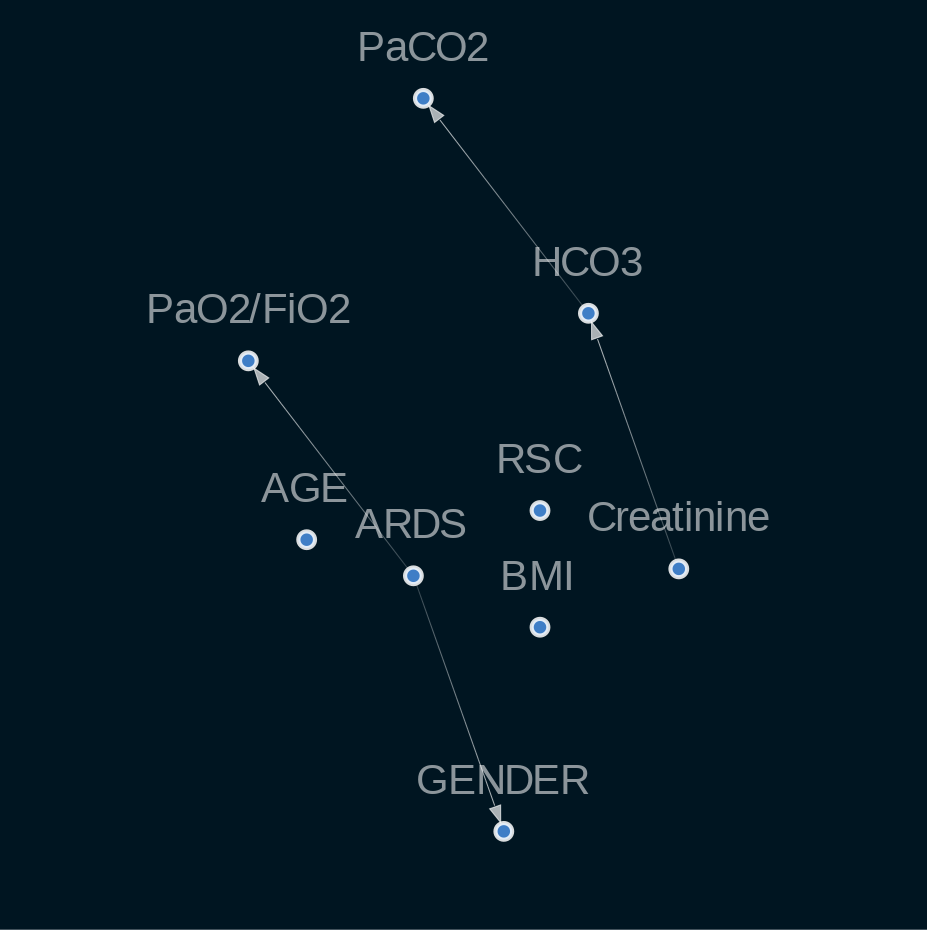

In [17]:
sm_t = sm.copy()
sm_t.remove_edges_below_threshold(0.2)

viz = plot_structure(
    sm_t,
    graph_attributes={"scale": "0.9"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "./structure_model.png"
viz.draw(filename)
Image(filename)

And for contrast we try with all time series.

In [0]:
df_e = df_enc.copy()
drops = ['PaO2', 'FiO2', 'Tidal_ml', 'Plateau_Pressure_cmH2O', \
  'Total_PEEP_cmH2O', 'AGE_INTERVALS']
df_e = df_e.drop(columns=drops)

df_e = add_series_list(['Creatinine', 'PaO2/FiO2', 'RSC', 'HCO3', 'PaCO2'])
df_e = impute(df_e)

drops = ['HADM_ID', 'CHARTDATE']
df_e = df_e.drop(columns=drops)

In [0]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(df_e)

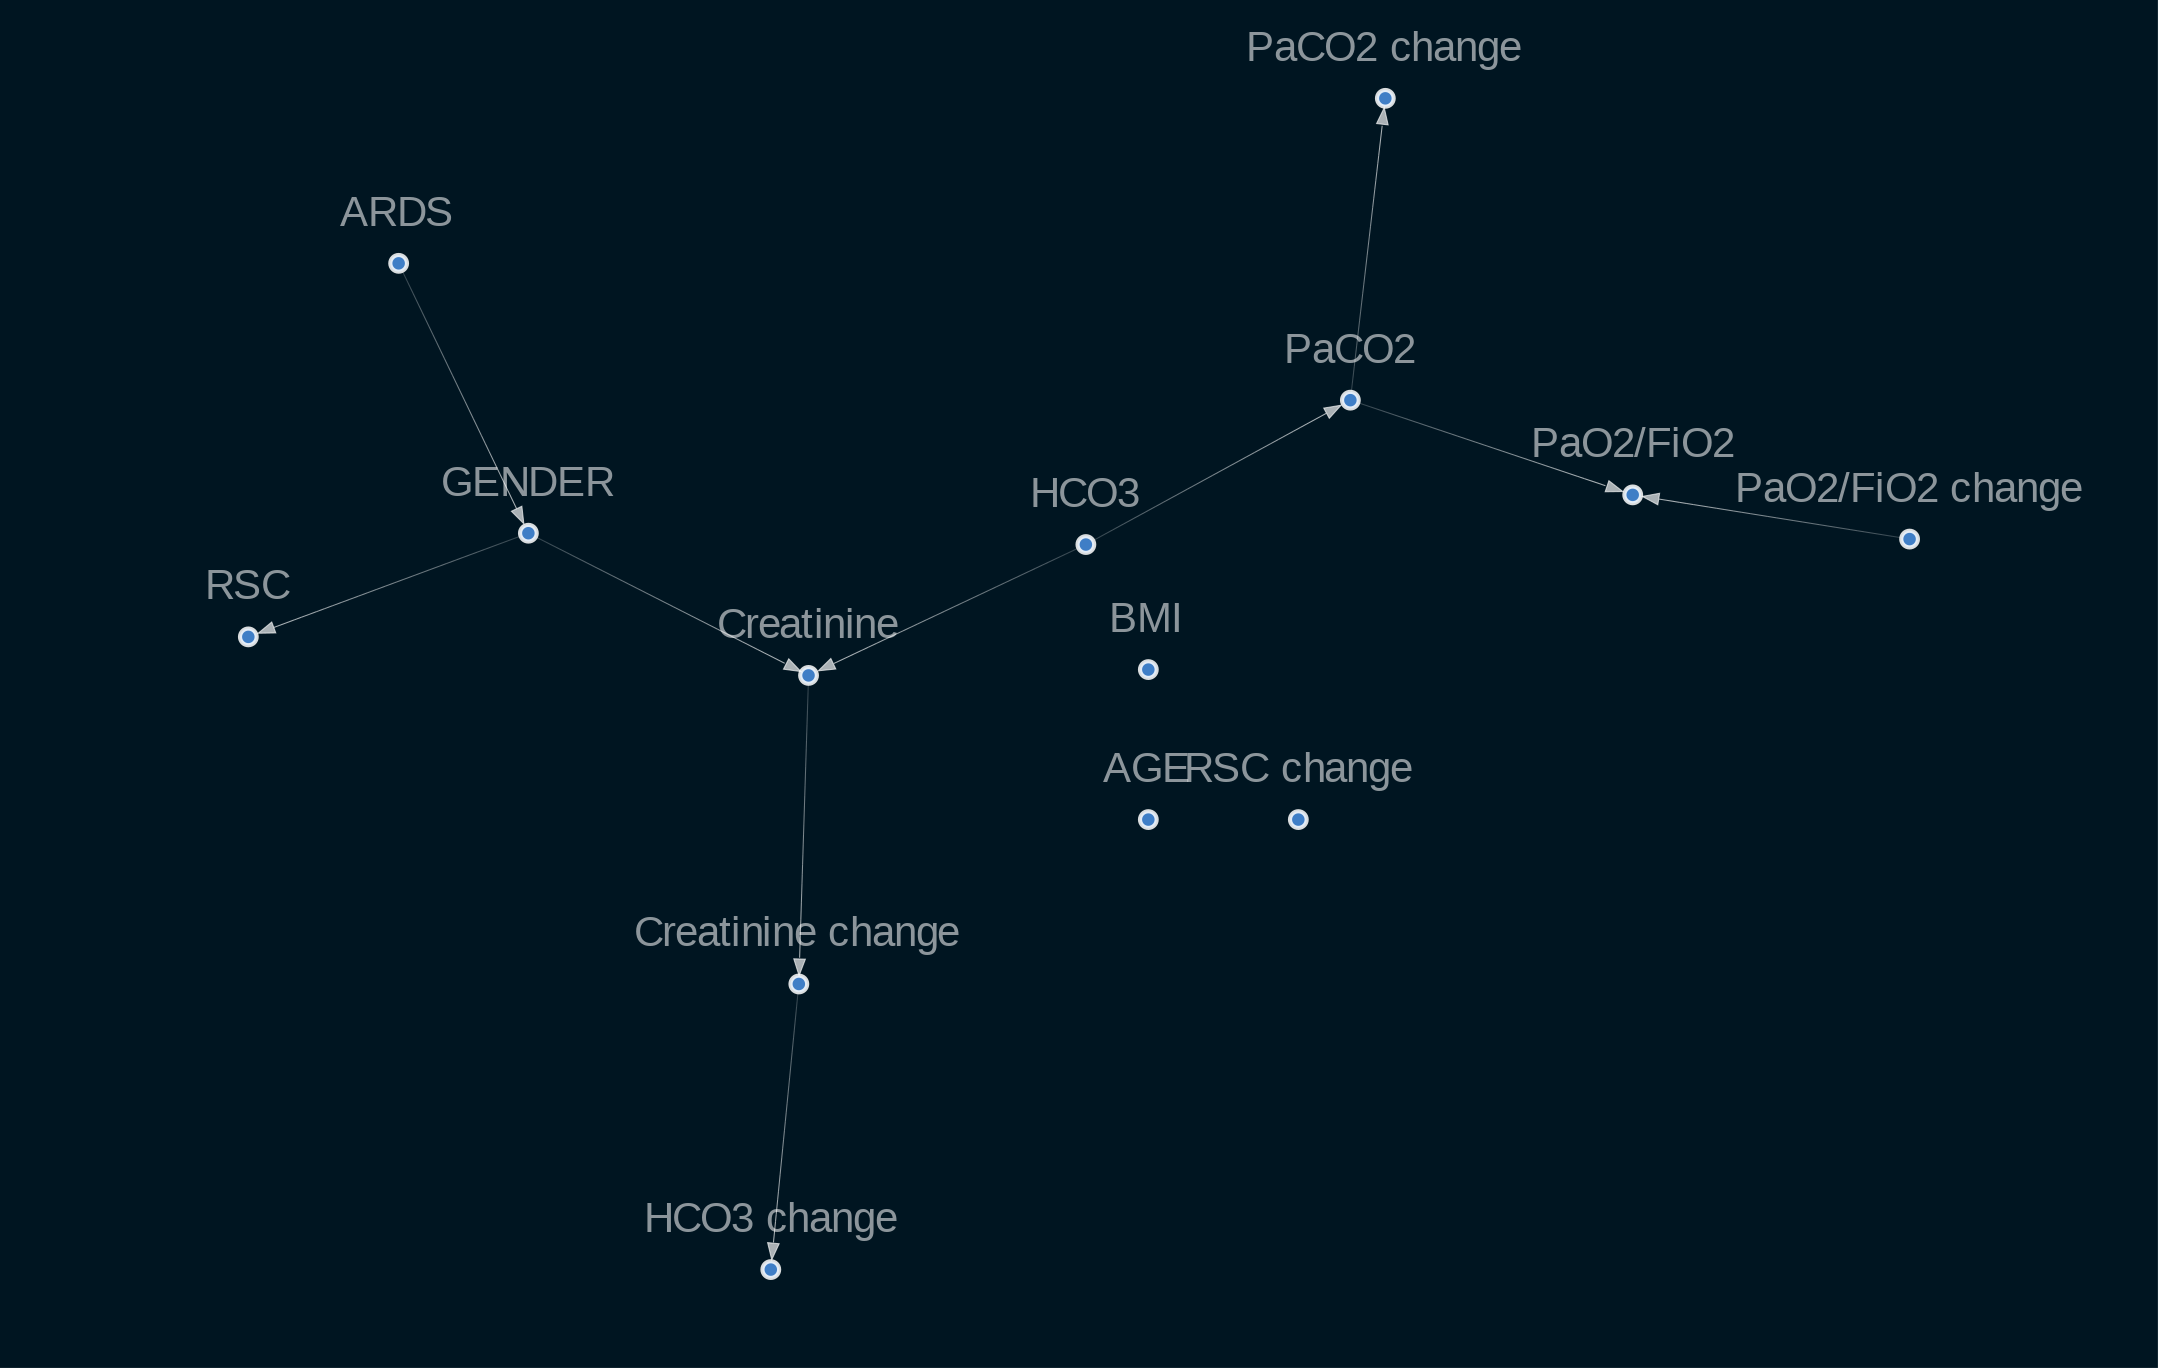

In [62]:
sm_t = sm.copy()
sm_t.remove_edges_below_threshold(0.15)

viz = plot_structure(
    sm_t,
    graph_attributes={"scale": "0.9"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "./structure_model.png"
viz.draw(filename)
Image(filename)